# Neural Networks 

# Multi-Layer Perceptron (MLP) with Backpropagation(BP)


# PART I : “1-detector”

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
df = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/TRNXX.csv",header=None)


In [2]:
df1 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/Labels.csv",header=None)
df1

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,5,0,4,1,9,2,1,3,1,4,...,6,7,8,1,0,7,3,2,1,2


In [3]:
df2 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/TRNY1.csv",header=None)
df2

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,-1,-1,-1,1,-1,-1,1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,1,-1


In [4]:
df.shape

(784, 5000)

In [5]:
trn = df.values
trn.shape

(784, 5000)

In [6]:
trnxx = trn.T
trnxx.shape

(5000, 784)

In [7]:
labels = df1.values
print(labels)
labels.shape

[[5 0 4 ... 2 1 2]]


(1, 5000)

In [8]:
trny1 = df2.values
print(trny1)
trny1.shape

[[-1 -1 -1 ... -1  1 -1]]


(1, 5000)

In [9]:
reshaped_patterns = trnxx.reshape((5000, 28, 28))
transposed_patterns = np.transpose(reshaped_patterns, (0, 2, 1))

### Displaying Patterns

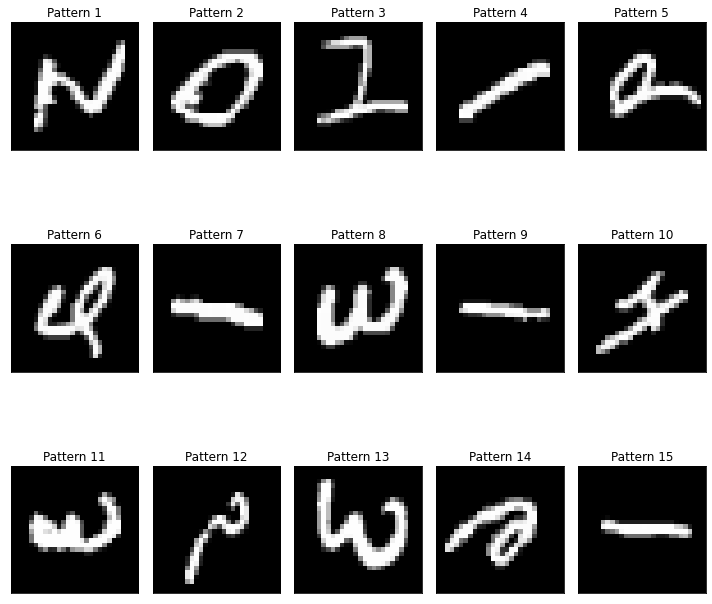

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first 15 transposed patterns
first_15_patterns = reshaped_patterns[:15]

fig, axes = plt.subplots(3, 5, figsize=(10, 10))

# Iterate through the patterns and display them in the subplots
for i, ax in enumerate(axes.flat):
    # Display the transposed pattern without cmap parameter
    ax.imshow(first_15_patterns[i], cmap='gray', vmin=0, vmax=1)  # Use a grayscale colormap
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Pattern {i + 1}')

plt.tight_layout()
plt.show()


In [11]:
# Set the number of input features, hidden units, and output units
num_input_units = 784  
num_hidden_units = 50
num_output_units = 1  

def tansig(x):
    return (2 / (1 + np.exp(-2*x))) - 1

def fdtansig(x):
    return 1 - (tansig(x)**2)


In [12]:
alp = 0.01
epochs = 40

In [13]:
trny11 = trny1.flatten()
print(trny11.shape)

(5000,)


## TRAINING  With 2 Alpha Values - "1 - Detector"

In [14]:

# Define the learning rates (alphas)
alpha_values = [0.1, 0.001]

# Maximum number of training epochs
max_epochs = 50
t = 0    

# Initialize dictionaries to track Mean Squared Error and weights for each alpha
mse_alpha = {}
w1_alpha = {}
w2_alpha = {}
w3_alpha = {}
w4_alpha = {}
w5_alpha = {}

# Filter all warnings
warnings.filterwarnings("ignore")

# Backpropogation training algorithm
for alpha in alpha_values:
    # Initialize weights and bias to zero for each alpha
    # Initialize weights and biases for the hidden layer
    W1 = np.random.randn(num_hidden_units, num_input_units) / 6
    b1 = np.random.randn(num_hidden_units, 1) / 6  
    # Initialize weights and biases for the output layer
    W2 = np.random.randn(num_output_units, num_hidden_units) / 6
    b2 = np.random.randn(num_output_units, 1) / 6
    t += 1
    print(f"OBSERVATIONS FOR ALPHA_{t}: {alpha}")
    mse_values = []
    w1_values = []
    w2_values = []
    w3_values = []
    w4_values = []
    w5_values = []

    #PHASE I - Forward propagation, and calculation of error
    for epoch in range(max_epochs):
        mse = 0  # Initialize MSE for this epoch
        for i, p in enumerate(trnxx):
            #PHASE I - Forward propagation, and calculation of error
            # From input pattern to activation of the first layer, a1
            n1 = (np.dot(W1, p).reshape(-1,1)) + b1
            a1 = tansig(n1)
            # From a1 to activation of layer 2 (which is the output)
            n2 = (np.dot(W2, a1).reshape(-1,1)) + b2
            a2 = tansig(n2)
            error = trny11[i] - a2
            # PHASE II - Backpropagation of sensitivities
            # s2 is found directly using the error 
            s2 = (-2) * (fdtansig(a2) * error)
            # Then s1 will be BACK PROPAGATED from s2:
            s1 = fdtansig(a1) * np.outer(W2, s2)
            # PHASE III - UPDATE ALL THE WEIGHTS AND BIASES
            # Update the weights for layer 2
            W2 = W2 - alp * np.outer(s2, a1)
            b2 = b2 - alp * s2.reshape(-1, 1)
            # Update the weights for layer 1
            W1 = W1 - alp * np.outer(s1, p)
            b1 = b1 - alp * s1.reshape(-1, 1)
            mse = mse + (error ** 2)  # Accumulate squared error
        
        # Calculate and print the average MSE for the epoch
        average_mse = mse / len(trnxx)
        W3 = W2.flatten()
        mse_values.append(average_mse)
        w1_values.append(W3[0])
        w2_values.append(W3[1])
        w3_values.append(W3[2])
        w4_values.append(W3[3])
        w5_values.append(W3[4])
        np.set_printoptions(precision=30)
        print(f"Epoch {epoch + 1}/{max_epochs}, Average MSE: {average_mse}")   
        #as with 0.001 i got the lowest MSE so this is the best alpha value i can choose
        if alpha == 0.001:     
            final_W1 = W1
            final_b1 = b1
            final_W2 = W2
            final_b2 = b2
    # Store the results for the current alpha
    mse_alpha[alpha] = mse_values
    w1_alpha[alpha] = w1_values
    w2_alpha[alpha] = w2_values
    w3_alpha[alpha] = w3_values
    w4_alpha[alpha] = w4_values
    w5_alpha[alpha] = w5_values
    

OBSERVATIONS FOR ALPHA_1: 0.1
Epoch 1/50, Average MSE: [[0.052905142066457515]]
Epoch 2/50, Average MSE: [[0.028740687646139844]]
Epoch 3/50, Average MSE: [[0.022977792423462477]]
Epoch 4/50, Average MSE: [[0.019706153294347342]]
Epoch 5/50, Average MSE: [[0.015185318906245462]]
Epoch 6/50, Average MSE: [[0.011510067608248561]]
Epoch 7/50, Average MSE: [[0.009285750176496384]]
Epoch 8/50, Average MSE: [[0.008023231862151856]]
Epoch 9/50, Average MSE: [[0.00778539933410658]]
Epoch 10/50, Average MSE: [[0.0048650463638554246]]
Epoch 11/50, Average MSE: [[0.004127644802602645]]
Epoch 12/50, Average MSE: [[0.004004758028126476]]
Epoch 13/50, Average MSE: [[0.0013050050403442444]]
Epoch 14/50, Average MSE: [[0.0016019449243788227]]
Epoch 15/50, Average MSE: [[0.0040061653881582416]]
Epoch 16/50, Average MSE: [[0.0007268524343353413]]
Epoch 17/50, Average MSE: [[0.0002983072499625218]]
Epoch 18/50, Average MSE: [[0.0001470768369796861]]
Epoch 19/50, Average MSE: [[0.00012278081595703305]]
Ep

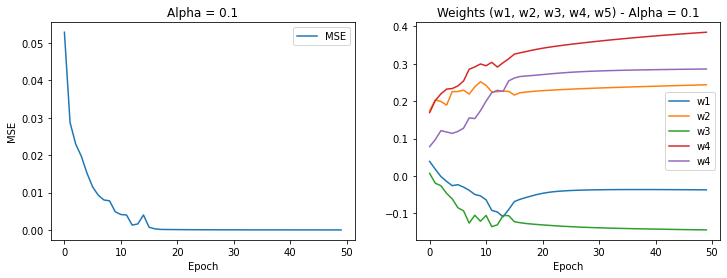

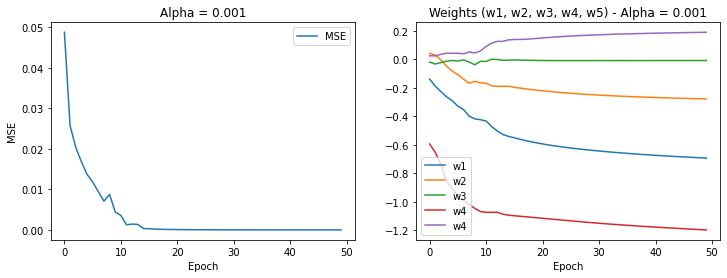

In [15]:
# Plot the values of  w1, w2, w3, w4, w5 vs. epoch for each alpha
for alpha in alpha_values:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    # Convert the list to a NumPy array and reshape
    mse_array = np.array(mse_alpha[alpha]).reshape(-1)
    plt.plot(range(len(mse_array)), mse_array, label='MSE')
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title(f"Alpha = {alpha}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(len(w1_alpha[alpha])), w1_alpha[alpha], label='w1')
    plt.plot(range(len(w2_alpha[alpha])), w2_alpha[alpha], label='w2')
    plt.plot(range(len(w3_alpha[alpha])), w3_alpha[alpha], label='w3')
    plt.plot(range(len(w4_alpha[alpha])), w4_alpha[alpha], label='w4')
    plt.plot(range(len(w5_alpha[alpha])), w5_alpha[alpha], label='w4')
    plt.xlabel("Epoch")
    plt.title(f"Weights (w1, w2, w3, w4, w5) - Alpha = {alpha}")
    plt.legend()

plt.show()

In [16]:
df4 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/RSVXX.csv",header=None)
df5 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/RLabels.csv",header=None)
df6 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/RSVY1.csv",header=None)
df7 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/RSVY3.csv",header=None)
df8 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/TRNY3.csv",header=None)

In [17]:
tmp_trny3= df8.values
print(tmp_trny3.shape)
trny3 = tmp_trny3.flatten()
print(trny3.shape)

(1, 5000)
(5000,)


In [18]:
rsv = df4.values
print(rsv.shape)
rsvxx = rsv.T
print(rsvxx.shape)


(784, 10000)
(10000, 784)


In [19]:
Rlabels = df5.values
print(Rlabels.shape)
rsvy1 = df6.values
print(rsvy1.shape)
rsvy3= df7.values
print(rsvy3.shape)

(1, 10000)
(1, 10000)
(1, 10000)


In [21]:
rsvy11 = rsvy1.flatten()
print(rsvy11.shape)
rsvy33 = rsvy3.flatten()
print(rsvy33.shape)

(10000,)
(10000,)


In [22]:
print(final_W1.shape)
print(final_b1.shape)
print(final_W2.shape)
print(final_b2.shape)
final_b2

(50, 784)
(50, 1)
(1, 50)
(1, 1)


array([[-0.10654655443316965]])

## TESTING - "1-Detector"

In [23]:
correct = 0;
incorrect = 0;
mse_test = 0
for i, p in enumerate(rsvxx):
            #PHASE I - Forward propagation, and calculation of error
            # From input pattern to activation of the first layer, a1
            n1 = (np.dot(final_W1, p).reshape(-1,1)) + final_b1
            a1 = tansig(n1)
            # From a1 to activation of layer 2 (which is the output)
            n2 = (np.dot(final_W2, a1).reshape(-1,1)) + final_b2
            a2 = tansig(n2)
            if a2 < 0:
                output = -1
            else:
                output = 1
            if (rsvy11[i] == output):
                correct = correct + 1
            else:
                incorrect = incorrect + 1
            error_test = rsvy11[i] - a2
            mse_test = mse_test + (error_test ** 2)  # Accumulate testing squared error

# Calculate and print the average testing MSE for the best model
average_mse_test = mse_test / len(rsvxx)
print(f"Final Test MSE for the Best Model: {average_mse_test}")
print(correct)
print(incorrect)
Hit_Ratio = correct/len(rsvxx)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Final Test MSE for the Best Model: [[0.020778596498603183]]
9937
63
0.9937
Accuracy: 99.37%


# PART II : “3-detector”

In [24]:
# Split RSVXX into VALXX and TSTXX
VALXX1= rsv[:, :5000]
TSTXX1 = rsv[:, 5000:]

# Split RSVY3 into VALY3 and TSTY3
VALY3 = (rsvy3[:, :5000]).flatten()
TSTY3 = (rsvy3[:, 5000:]).flatten()

VALXX = VALXX1.T
TSTXX = TSTXX1.T


In [25]:
len(VALXX)

5000

## TRAINING & VALIDATION With 2 Alpha Values - "3 - Detector"

In [36]:
# Define the learning rates (alphas)
alpha_values = [0.1, 0.001]

# Maximum number of training epochs
max_epochs = 50
t = 0    

# Initialize dictionaries to track Mean Squared Error and weights for each alpha
mse_alpha = {}
w1_alpha = {}
w2_alpha = {}
w3_alpha = {}
w4_alpha = {}
w5_alpha = {}

# Filter all warnings
warnings.filterwarnings("ignore")

# Backpropagation training algorithm
for alpha in alpha_values:
    # Initialize weights and bias to zero for each alpha
    # Initialize weights and biases for the hidden layer
    W1 = np.random.randn(num_hidden_units, num_input_units) / 6
    b1 = np.random.randn(num_hidden_units, 1) / 6  
    # Initialize weights and biases for the output layer
    W2 = np.random.randn(num_output_units, num_hidden_units) / 6
    b2 = np.random.randn(num_output_units, 1) / 6
    t += 1
    print(f"OBSERVATIONS FOR ALPHA_{t}: {alpha}")
    
    # Lists to store MSE values during training and validation
    mse_values_train = []
    mse_values_val = []
    w1_values = []
    w2_values = []
    w3_values = []
    w4_values = []
    w5_values = []
    
    for epoch in range(max_epochs):
        # PHASE I - Training
        mse_train = 0  # Initialize training MSE for this epoch
        for i, p in enumerate(trnxx):
            # Forward propagation for training
            n1 = np.dot(W1, p).reshape(-1, 1) + b1
            a1 = tansig(n1)
            n2 = np.dot(W2, a1).reshape(-1, 1) + b2
            a2 = tansig(n2)
            error = trny3[i] - a2
            s2 = (-2) * (fdtansig(a2) * error)
            s1 = fdtansig(a1) * np.outer(W2, s2)
            W2 = W2 - alpha * np.outer(s2, a1)
            b2 = b2 - alpha * s2.reshape(-1, 1)
            W1 = W1 - alpha * np.outer(s1, p)
            b1 = b1 - alpha * s1.reshape(-1, 1)
            mse_train = mse_train + (error ** 2)  # Accumulate training squared error
            
        # Calculate, store and print the average Training MSE for the epoch
        average_mse_train = mse_train / len(trnxx)
        mse_values_train.append(average_mse_train)
        W3 = W2.flatten()
        w1_values.append(W3[0])
        w2_values.append(W3[1])
        w3_values.append(W3[2])
        w4_values.append(W3[3])
        w5_values.append(W3[4])
        np.set_printoptions(precision=30)
        print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")  
        
        
        # PHASE II - Validation
        mse_val = 0  # Initialize validation MSE for this epoch
        for i, p_val in enumerate(VALXX):
            # Forward propagation for validation
            n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
            a1_val = tansig(n1_val)
            n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
            a2_val = tansig(n2_val)
            error_val = VALY3[i] - a2_val
            mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

        # Calculate and store the average validation MSE for the epoch
        average_mse_val = mse_val / len(VALXX)
        mse_values_val.append(average_mse_val)
        print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")
        
        
    # Store the results for the current alpha
    mse_alpha[alpha] = {'train': mse_values_train, 'val': mse_values_val}
    w1_alpha[alpha] = w1_values
    w2_alpha[alpha] = w2_values
    w3_alpha[alpha] = w3_values
    w4_alpha[alpha] = w4_values
    w5_alpha[alpha] = w5_values
    
# Print the final MSE values for both alpha values
for alpha, mse_values in mse_alpha.items():
    print(f"Final Training MSE for Alpha {alpha}: {mse_values['train'][-1]}")
    print(f"Final Validation MSE for Alpha {alpha}: {mse_values['val'][-1]}")


OBSERVATIONS FOR ALPHA_1: 0.1
Epoch 1/50, Training MSE: [[0.2415849834659913]]
Epoch 1/50, Validation MSE: [[0.3662102636199874]]
Epoch 2/50, Training MSE: [[0.1603538282411051]]
Epoch 2/50, Validation MSE: [[0.32525799548765755]]
Epoch 3/50, Training MSE: [[0.15635318424897326]]
Epoch 3/50, Validation MSE: [[0.21399260781115909]]
Epoch 4/50, Training MSE: [[0.13093466053128708]]
Epoch 4/50, Validation MSE: [[0.28022994818806807]]
Epoch 5/50, Training MSE: [[0.13083483850352423]]
Epoch 5/50, Validation MSE: [[0.1955899721799196]]
Epoch 6/50, Training MSE: [[0.1295615384850281]]
Epoch 6/50, Validation MSE: [[0.23177457662010073]]
Epoch 7/50, Training MSE: [[0.1157843741258173]]
Epoch 7/50, Validation MSE: [[0.2763005896756955]]
Epoch 8/50, Training MSE: [[0.12269236770057428]]
Epoch 8/50, Validation MSE: [[0.34135302919613625]]
Epoch 9/50, Training MSE: [[0.12057225354356849]]
Epoch 9/50, Validation MSE: [[0.20257415667478476]]
Epoch 10/50, Training MSE: [[0.11369104838338005]]
Epoch 10

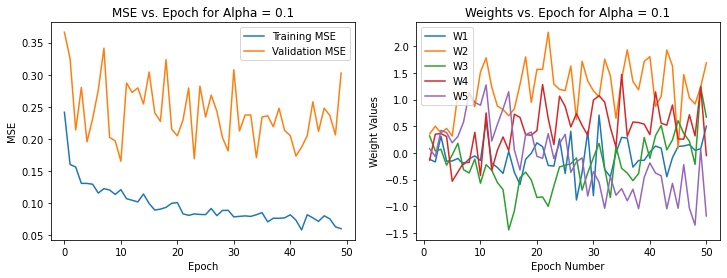

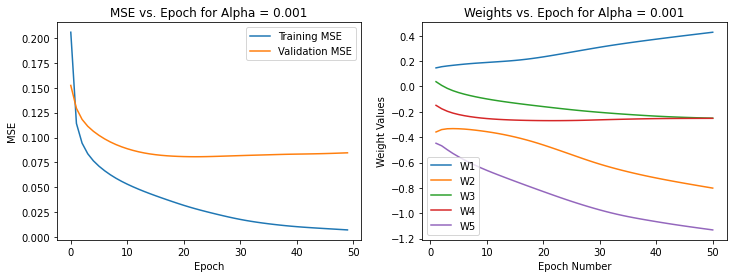

In [37]:
# Plot MSE for each alpha with validation curve
for alpha in alpha_values:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    
    # Training MSE
    mse_train_array = np.array(mse_alpha[alpha]['train']).reshape(-1)
    plt.plot(range(len(mse_train_array)), mse_train_array, label='Training MSE')

    # Validation MSE
    mse_val_array = np.array(mse_alpha[alpha]['val']).reshape(-1)
    plt.plot(range(len(mse_val_array)), mse_val_array, label='Validation MSE')

    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title(f"MSE vs. Epoch for Alpha = {alpha}")
    plt.legend()

    plt.subplot(1, 2, 2)
    epochs = range(1, max_epochs + 1)
    
    # Ensure the lengths of weights are consistent with the number of epochs
    w1_values = w1_alpha[alpha][:max_epochs]
    w2_values = w2_alpha[alpha][:max_epochs]
    w3_values = w3_alpha[alpha][:max_epochs]
    w4_values = w4_alpha[alpha][:max_epochs]
    w5_values = w5_alpha[alpha][:max_epochs]
    
    plt.plot(epochs, w1_values, label='W1')
    plt.plot(epochs, w2_values, label='W2')
    plt.plot(epochs, w3_values, label='W3')
    plt.plot(epochs, w4_values, label='W4')
    plt.plot(epochs, w5_values, label='W5')
    plt.xlabel('Epoch Number')
    plt.ylabel('Weight Values')
    plt.title(f'Weights vs. Epoch for Alpha = {alpha}')
    plt.legend()

    plt.show()


In [35]:
# Define the learning rate (alpha)
alpha = 0.001

# Maximum number of training epochs
max_epochs = 50

# Filter all warnings
warnings.filterwarnings("ignore")

# Initialize weights and bias
W1 = np.random.randn(num_hidden_units, num_input_units) / 6
b1 = np.random.randn(num_hidden_units, 1) / 6
W2 = np.random.randn(num_output_units, num_hidden_units) / 6
b2 = np.random.randn(num_output_units, 1) / 6

# Lists to store MSE values during training and validation
mse_values_train = []
mse_values_val = []

# Backpropagation training algorithm
for epoch in range(max_epochs):
    # PHASE I - Training
    mse_train = 0  # Initialize training MSE for this epoch
    for i, p in enumerate(trnxx):
        # Forward propagation for training
        n1 = np.dot(W1, p).reshape(-1, 1) + b1
        a1 = tansig(n1)
        n2 = np.dot(W2, a1).reshape(-1, 1) + b2
        a2 = tansig(n2)
        error = trny3[i] - a2
        s2 = (-2) * (fdtansig(a2) * error)
        s1 = fdtansig(a1) * np.outer(W2, s2)
        W2 = W2 - alpha * np.outer(s2, a1)
        b2 = b2 - alpha * s2.reshape(-1, 1)
        W1 = W1 - alpha * np.outer(s1, p)
        b1 = b1 - alpha * s1.reshape(-1, 1)
        mse_train = mse_train + (error ** 2)  # Accumulate training squared error
    
    # Calculate and store the average Training MSE for the epoch
    average_mse_train = mse_train / len(trnxx)
    
    mse_values_train.append(average_mse_train)
    np.set_printoptions(precision=30)
    print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

    # PHASE II - Validation
    mse_val = 0  # Initialize validation MSE for this epoch
    correct = 0
    incorrect = 0
    for i, p_val in enumerate(VALXX):
        # Forward propagation for validation
        n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
        a1_val = tansig(n1_val)
        n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
        a2_val = tansig(n2_val)
        if a2_val < 0:
            output = -1
        else:
            output = 1
        if (VALY3[i] == output):
            correct = correct + 1
        else:
            incorrect = incorrect + 1
        error_val = VALY3[i] - a2_val
        mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

    # Calculate and store the average validation MSE for the epoch
    average_mse_val = mse_val / len(VALXX)
    mse_values_val.append(average_mse_val)
    print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

print(correct)
print(incorrect)
Hit_Ratio = correct/len(VALXX)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")
# Print the final MSE values for the alpha value
print(f"Final Training MSE for Alpha {alpha}: {mse_alpha[alpha]['train'][-1]}")
print(f"Final Validation MSE for Alpha {alpha}: {mse_alpha[alpha]['val'][-1]}")


Epoch 1/50, Training MSE: [[0.20269524398602284]]
Epoch 1/50, Validation MSE: [[0.14673479707393336]]
Epoch 2/50, Training MSE: [[0.1205038620229153]]
Epoch 2/50, Validation MSE: [[0.12572564067259465]]
Epoch 3/50, Training MSE: [[0.10125651266985101]]
Epoch 3/50, Validation MSE: [[0.11613690993749706]]
Epoch 4/50, Training MSE: [[0.08948587903811059]]
Epoch 4/50, Validation MSE: [[0.11053929668123433]]
Epoch 5/50, Training MSE: [[0.08105506143850212]]
Epoch 5/50, Validation MSE: [[0.10655785055887321]]
Epoch 6/50, Training MSE: [[0.07456110361850023]]
Epoch 6/50, Validation MSE: [[0.10328883321197511]]
Epoch 7/50, Training MSE: [[0.06926534456553317]]
Epoch 7/50, Validation MSE: [[0.10053167395425229]]
Epoch 8/50, Training MSE: [[0.06473471563048808]]
Epoch 8/50, Validation MSE: [[0.09824153820340734]]
Epoch 9/50, Training MSE: [[0.06070440296715542]]
Epoch 9/50, Validation MSE: [[0.09637153081325876]]
Epoch 10/50, Training MSE: [[0.057020510522171775]]
Epoch 10/50, Validation MSE: [[

## TRAINING & VALIDATION With Alpha = 0.001 using EARLY STOP  - "3 - Detector"

In [38]:
# Define the learning rate (alpha)
alpha = 0.001

# Maximum number of training epochs
max_epochs = 50

# Number of epochs for early stopping
early_stop_epochs = 5

# Filter all warnings
warnings.filterwarnings("ignore")

# Initialize weights and bias
W1 = np.random.randn(num_hidden_units, num_input_units) / 6
b1 = np.random.randn(num_hidden_units, 1) / 6
W2 = np.random.randn(num_output_units, num_hidden_units) / 6
b2 = np.random.randn(num_output_units, 1) / 6

# Lists to store MSE values during training and validation
mse_values_train = []
mse_values_val = []

# Best validation MSE and corresponding model parameters
best_val_mse = float('inf')
best_W1 = None
best_b1 = None
best_W2 = None
best_b2 = None

# Backpropagation training algorithm
for epoch in range(max_epochs):
    # PHASE I - Training
    mse_train = 0  # Initialize training MSE for this epoch
    for i, p in enumerate(trnxx):
        # Forward propagation for training
        n1 = np.dot(W1, p).reshape(-1, 1) + b1
        a1 = tansig(n1)
        n2 = np.dot(W2, a1).reshape(-1, 1) + b2
        a2 = tansig(n2)
        error = trny3[i] - a2
        s2 = (-2) * (fdtansig(a2) * error)
        s1 = fdtansig(a1) * np.outer(W2, s2)
        W2 = W2 - alpha * np.outer(s2, a1)
        b2 = b2 - alpha * s2.reshape(-1, 1)
        W1 = W1 - alpha * np.outer(s1, p)
        b1 = b1 - alpha * s1.reshape(-1, 1)
        mse_train = mse_train + (error ** 2)  # Accumulate training squared error
    
    # Calculate and store the average Training MSE for the epoch
    average_mse_train = mse_train / len(trnxx)
    mse_values_train.append(average_mse_train)
    np.set_printoptions(precision=30)
    print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

    # PHASE II - Validation
    mse_val = 0  # Initialize validation MSE for this epoch
    correct = 0
    incorrect = 0
    for i, p_val in enumerate(VALXX):
        # Forward propagation for validation
        n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
        a1_val = tansig(n1_val)
        n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
        a2_val = tansig(n2_val)
        if a2_val < 0:
            output = -1
        else:
            output = 1
        if (VALY3[i] == output):
            correct = correct + 1
        else:
            incorrect = incorrect + 1
        error_val = VALY3[i] - a2_val
        mse_val = mse_val + (error_val ** 2)  # Accumulate validation squared error

    # Calculate and store the average validation MSE for the epoch
    average_mse_val = mse_val / len(VALXX)
    mse_values_val.append(average_mse_val)
    print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

    # Check for early stopping based on validation MSE
    if epoch > early_stop_epochs and (average_mse_val >= mse_values_val[-early_stop_epochs:]).all():
        print(f"Early stopping at Epoch {epoch + 1}, Best Validation MSE: {best_val_mse}")
        break

    # Update the best model if the current model has a lower validation MSE
    if average_mse_val < best_val_mse:
        best_val_mse = average_mse_val
        best_W1 = np.copy(W1)
        best_b1 = np.copy(b1)
        best_W2 = np.copy(W2)
        best_b2 = np.copy(b2)

print(correct)
print(incorrect)
Hit_Ratio = correct/len(VALXX)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")
# Print the final MSE values for the best model
print(f"Final Training MSE for the Best Model: {mse_values_train[-1]}")
print(f"Final Validation MSE for the Best Model: {best_val_mse}")




Epoch 1/50, Training MSE: [[0.1754744632071968]]
Epoch 1/50, Validation MSE: [[0.1379276653283358]]
Epoch 2/50, Training MSE: [[0.1079464249997841]]
Epoch 2/50, Validation MSE: [[0.1192940381929535]]
Epoch 3/50, Training MSE: [[0.09235734294266758]]
Epoch 3/50, Validation MSE: [[0.11046467151802417]]
Epoch 4/50, Training MSE: [[0.08327100728335789]]
Epoch 4/50, Validation MSE: [[0.10483007466823001]]
Epoch 5/50, Training MSE: [[0.07698419056557725]]
Epoch 5/50, Validation MSE: [[0.10070186577657474]]
Epoch 6/50, Training MSE: [[0.07213490025604846]]
Epoch 6/50, Validation MSE: [[0.09749392121557583]]
Epoch 7/50, Training MSE: [[0.06814919973080903]]
Epoch 7/50, Validation MSE: [[0.09491055041253191]]
Epoch 8/50, Training MSE: [[0.06473886735536792]]
Epoch 8/50, Validation MSE: [[0.09280830295746208]]
Epoch 9/50, Training MSE: [[0.06171857658049685]]
Epoch 9/50, Validation MSE: [[0.09110679362657202]]
Epoch 10/50, Training MSE: [[0.05895979292792998]]
Epoch 10/50, Validation MSE: [[0.08

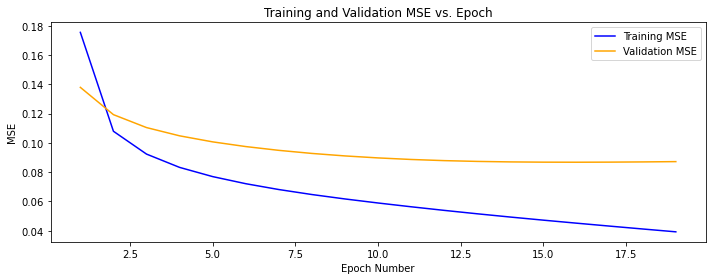

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming mse_values_train and mse_values_val are numpy arrays
mse_values_train = np.ravel(mse_values_train)
mse_values_val = np.ravel(mse_values_val)

# Plotting the learning curves
plt.figure(figsize=(10, 4))

# Plot training and validation MSE curves
plt.plot(range(1, len(mse_values_train) + 1), mse_values_train, label='Training MSE', color='blue')
plt.plot(range(1, len(mse_values_val) + 1), mse_values_val, label='Validation MSE', color='orange')

plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.title('Training and Validation MSE vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()


## TESTING - "3 - Detector"

In [40]:
# Evaluate the best model on the test set
mse_test = 0
correct = 0;
incorrect = 0;
for i, p_test in enumerate(TSTXX):
    # Forward propagation for testing using the best model
    n1_test = np.dot(best_W1, p_test).reshape(-1, 1) + best_b1
    a1_test = tansig(n1_test)
    n2_test = np.dot(best_W2, a1_test).reshape(-1, 1) + best_b2
    a2_test = tansig(n2_test)
    if a2_test < 0:
        output = -1
    else:
        output = 1
    if (TSTY3[i] == output):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
    error_test = TSTY3[i] - a2_test
    mse_test = mse_test + (error_test ** 2)  # Accumulate testing squared error

# Calculate and print the average testing MSE for the best model
average_mse_test = mse_test / len(TSTXX)
print(f"Final Test MSE for the Best Model: {average_mse_test}")
print(correct)
print(incorrect)
Hit_Ratio = correct/len(TSTXX)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Final Test MSE for the Best Model: [[0.05695269229460733]]
4913
87
0.9826
Accuracy: 98.26%


# PART III : “MULTI-CLASS CLASSIFICATION”

In [41]:
df9 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/RSV10Y.csv",header=None)
df10 = pd.read_csv("C:/Users/DELL/Downloads/ANN_PROJECT_2/CSV/TRN10Y.csv",header=None)

In [56]:
rsv10y = df9.values
print(rsv10y.shape)
trn10y = df10.values
print(trn10y.shape)

(10, 10000)
(10, 5000)


In [49]:
# Split RSVY3 into VAL10Y and TST10Y
VAL10Y = (rsv10y[:, :5000])
TST10Y = (rsv10y[:, 5000:])

In [55]:
VAL10Y.shape

(10, 5000)

## TRAINING & VALIDATION With 2 Alpha Values - "Multi-Class"

In [79]:
# Define the learning rates (alphas)
alpha_values = [0.1, 0.001]

# Maximum number of training epochs
max_epochs = 80
t = 0    

# Define the architecture of the neural network
num_input_units = 784
num_hidden_units = 60
num_output_units = 10

# Initialize dictionaries to track Mean Squared Error and weights for each alpha
mse_alpha = {}
w1_alpha = {}
w2_alpha = {}
w3_alpha = {}
w4_alpha = {}
w5_alpha = {}

# Filter all warnings
warnings.filterwarnings("ignore")

# Backpropagation training algorithm
for alpha in alpha_values:
    # Initialize weights and bias to zero for each alpha
    # Initialize weights and biases for the hidden layer
    W1 = np.random.randn(num_hidden_units, num_input_units) / 6
    b1 = np.random.randn(num_hidden_units, 1) / 6  
    # Initialize weights and biases for the output layer
    W2 = np.random.randn(num_output_units, num_hidden_units) / 6
    b2 = np.random.randn(num_output_units, 1) / 6
    t += 1
    print(f"OBSERVATIONS FOR ALPHA_{t}: {alpha}")
    
    # Lists to store MSE values during training and validation
    mse_values_train = []
    mse_values_val = []
    w1_values = []
    w2_values = []
    w3_values = []
    w4_values = []
    w5_values = []
    
    for epoch in range(max_epochs):
        # PHASE I - Training
        mse_train = 0  # Initialize training MSE for this epoch
        for i, p in enumerate(trnxx):
            # Forward propagation for training
            n1 = np.dot(W1, p).reshape(-1, 1) + b1
            a1 = tansig(n1)
            n2 = np.dot(W2, a1).reshape(-1, 1) + b2
            a2 = tansig(n2)
            error = trn10y[:, i].reshape(-1,1) - a2
            s2 = (-2) * (fdtansig(a2) * error)
            s1 = fdtansig(a1) * np.dot(W2.T, s2).reshape(-1,1)
            W2 = W2 - alpha * np.outer(s2, a1)
            b2 = b2 - alpha * s2.reshape(-1, 1)
            W1 = W1 - alpha * np.outer(s1, p)
            b1 = b1 - alpha * s1.reshape(-1, 1)
            mse_train = mse_train + (error ** 2).sum()  # Accumulate training squared error
            
        # Calculate, store and print the average Training MSE for the epoch
        average_mse_train = mse_train / len(trnxx)
        mse_values_train.append(average_mse_train)
        W3 = W2.flatten()
        w1_values.append(W3[0])
        w2_values.append(W3[11])
        w3_values.append(W3[22])
        w4_values.append(W3[33])
        w5_values.append(W3[44])
        np.set_printoptions(precision=30)
        print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")  
        
        
        # PHASE II - Validation
        mse_val = 0  # Initialize validation MSE for this epoch
        for i, p_val in enumerate(VALXX):
            # Forward propagation for validation
            n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
            a1_val = tansig(n1_val)
            n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
            a2_val = tansig(n2_val)
            error_val = VAL10Y[:, i].reshape(-1,1) - a2_val
            mse_val = mse_val + (error_val ** 2).sum()  # Accumulate validation squared error

        # Calculate and store the average validation MSE for the epoch
        average_mse_val = mse_val / len(VALXX)
        mse_values_val.append(average_mse_val)
        print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")
        
        
    # Store the results for the current alpha
    mse_alpha[alpha] = {'train': mse_values_train, 'val': mse_values_val}
    w1_alpha[alpha] = w1_values
    w2_alpha[alpha] = w2_values
    w3_alpha[alpha] = w3_values
    w4_alpha[alpha] = w4_values
    w5_alpha[alpha] = w5_values
    
# Print the final MSE values for both alpha values
for alpha, mse_values in mse_alpha.items():
    print(f"Final Training MSE for Alpha {alpha}: {mse_values['train'][-1]}")
    print(f"Final Validation MSE for Alpha {alpha}: {mse_values['val'][-1]}")


OBSERVATIONS FOR ALPHA_1: 0.1
Epoch 1/80, Training MSE: 2.359314217903231
Epoch 1/80, Validation MSE: 2.1619187993042526
Epoch 2/80, Training MSE: 1.5193371174969938
Epoch 2/80, Validation MSE: 1.8187066775545562
Epoch 3/80, Training MSE: 1.4356395099830697
Epoch 3/80, Validation MSE: 1.464199215937804
Epoch 4/80, Training MSE: 1.2493473679376883
Epoch 4/80, Validation MSE: 1.7779515345606745
Epoch 5/80, Training MSE: 1.2037842375604475
Epoch 5/80, Validation MSE: 1.5468926193508932
Epoch 6/80, Training MSE: 1.2025566227836049
Epoch 6/80, Validation MSE: 1.5524831707510809
Epoch 7/80, Training MSE: 1.1099392440610216
Epoch 7/80, Validation MSE: 1.9172169028344612
Epoch 8/80, Training MSE: 1.100686485017882
Epoch 8/80, Validation MSE: 1.5790831255200442
Epoch 9/80, Training MSE: 1.0819253441217742
Epoch 9/80, Validation MSE: 1.5088227580588598
Epoch 10/80, Training MSE: 1.0329897582216931
Epoch 10/80, Validation MSE: 1.5426925696402967
Epoch 11/80, Training MSE: 0.9944466154904917
Epoch

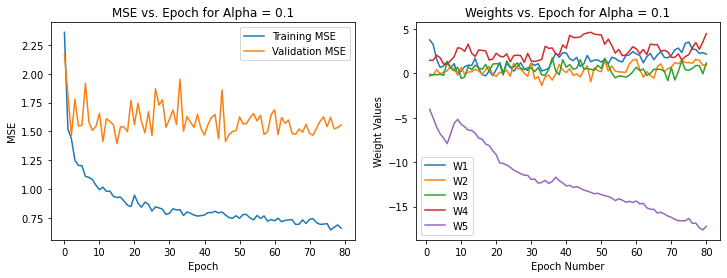

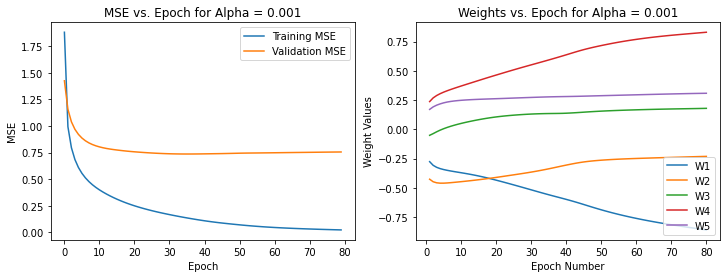

In [80]:
# Plot MSE for each alpha with validation curve
for alpha in alpha_values:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    
    # Training MSE
    mse_train_array = np.array(mse_alpha[alpha]['train']).reshape(-1)
    plt.plot(range(len(mse_train_array)), mse_train_array, label='Training MSE')

    # Validation MSE
    mse_val_array = np.array(mse_alpha[alpha]['val']).reshape(-1)
    plt.plot(range(len(mse_val_array)), mse_val_array, label='Validation MSE')

    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title(f"MSE vs. Epoch for Alpha = {alpha}")
    plt.legend()

    plt.subplot(1, 2, 2)
    epochs = range(1, max_epochs + 1)
    
    # Ensure the lengths of weights are consistent with the number of epochs
    w1_values = w1_alpha[alpha][:max_epochs]
    w2_values = w2_alpha[alpha][:max_epochs]
    w3_values = w3_alpha[alpha][:max_epochs]
    w4_values = w4_alpha[alpha][:max_epochs]
    w5_values = w5_alpha[alpha][:max_epochs]
    
    plt.plot(epochs, w1_values, label='W1')
    plt.plot(epochs, w2_values, label='W2')
    plt.plot(epochs, w3_values, label='W3')
    plt.plot(epochs, w4_values, label='W4')
    plt.plot(epochs, w5_values, label='W5')
    plt.xlabel('Epoch Number')
    plt.ylabel('Weight Values')
    plt.title(f'Weights vs. Epoch for Alpha = {alpha}')
    plt.legend()

    plt.show()


In [91]:
# Define the learning rate (alpha)
alpha = 0.001

# Maximum number of training epochs
max_epochs = 80

# Number of output units
num_output_units = 10

# Filter all warnings
warnings.filterwarnings("ignore")

# Initialize weights and bias
W1 = np.random.randn(num_hidden_units, num_input_units) / 6
b1 = np.random.randn(num_hidden_units, 1) / 6
W2 = np.random.randn(num_output_units, num_hidden_units) / 6
b2 = np.random.randn(num_output_units, 1) / 6

# Lists to store MSE values during training and validation
mse_values_train = []
mse_values_val = []

# Backpropagation training algorithm
for epoch in range(max_epochs):
    # PHASE I - Training
    mse_train = 0  # Initialize training MSE for this epoch
    for i, p in enumerate(trnxx):
        # Forward propagation for training
        n1 = np.dot(W1, p).reshape(-1, 1) + b1
        a1 = tansig(n1)
        n2 = np.dot(W2, a1).reshape(-1, 1) + b2
        a2 = tansig(n2)
        error = trn10y[:, i].reshape(-1,1) - a2
        s2 = (-2) * (fdtansig(a2) * error)
        s1 = fdtansig(a1) * np.dot(W2.T, s2).reshape(-1,1)
        W2 = W2 - alpha * np.outer(s2, a1)
        b2 = b2 - alpha * s2.reshape(-1, 1)
        W1 = W1 - alpha * np.outer(s1, p)
        b1 = b1 - alpha * s1.reshape(-1, 1)
        mse_train = mse_train + (error ** 2).sum()  # Accumulate training squared error
    
    # Calculate and store the average Training MSE for the epoch
    average_mse_train = mse_train / len(trnxx)
    mse_values_train.append(average_mse_train)
    np.set_printoptions(precision=30)
    print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

    # PHASE II - Validation
    mse_val = 0  # Initialize validation MSE for this epoch
    correct = 0
    incorrect = 0
    for i, p_val in enumerate(VALXX):
        # Forward propagation for validation
        n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
        a1_val = tansig(n1_val)
        n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
        a2_val = tansig(n2_val)
        predicted_digit = (np.argmax(a2_val) + 1) % 10  # Predicted digit is the one with the highest activation
        #print(f"Predicted Digit: {predicted_digit}")
        true_digit = (np.argmax(VAL10Y[:, i]) + 1 ) % 10 # True digit is the one with a value of 1 in the target
        #print(f"true Digit: {true_digit}")
        if predicted_digit == true_digit:
            correct = correct + 1
        else:
            incorrect = incorrect + 1
        error_val = VAL10Y[:, i].reshape(-1, 1) - a2_val
        mse_val = mse_val + (error_val ** 2).sum()  # Accumulate validation squared error

    # Calculate and store the average validation MSE for the epoch
    average_mse_val = mse_val / len(VALXX)
    mse_values_val.append(average_mse_val)
    print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

print(f"Correctly classified: {correct}")
print(f"Incorrectly classified: {incorrect}")
accuracy = correct / len(VALXX) * 100
print(f"Accuracy: {accuracy:.2f}%")


Epoch 1/80, Training MSE: 1.765140197393816
Epoch 1/80, Validation MSE: 1.4083867937492445
Epoch 2/80, Training MSE: 0.960374702786352
Epoch 2/80, Validation MSE: 1.157035641146562
Epoch 3/80, Training MSE: 0.7816232597727205
Epoch 3/80, Validation MSE: 1.036871725377092
Epoch 4/80, Training MSE: 0.678531283708313
Epoch 4/80, Validation MSE: 0.9617236232922604
Epoch 5/80, Training MSE: 0.6065028551839079
Epoch 5/80, Validation MSE: 0.9098570443362741
Epoch 6/80, Training MSE: 0.5515691457999381
Epoch 6/80, Validation MSE: 0.8717748286726924
Epoch 7/80, Training MSE: 0.5075259047111651
Epoch 7/80, Validation MSE: 0.8420412138907691
Epoch 8/80, Training MSE: 0.4708403774585954
Epoch 8/80, Validation MSE: 0.8178358494539463
Epoch 9/80, Training MSE: 0.43939340782723746
Epoch 9/80, Validation MSE: 0.7976587618819304
Epoch 10/80, Training MSE: 0.41192885288640735
Epoch 10/80, Validation MSE: 0.7807529452204081
Epoch 11/80, Training MSE: 0.3876601416003282
Epoch 11/80, Validation MSE: 0.7666

## TRAINING & VALIDATION With Alpha = 0.001 using EARLY STOP  - "Multi-Class"

In [83]:
# Define the learning rate (alpha)
alpha = 0.001

# Maximum number of training epochs
max_epochs = 80

# Number of epochs for early stopping
early_stop_epochs = 5

# Define the architecture of the neural network
num_input_units = 784
num_hidden_units = 60
num_output_units = 10

# Filter all warnings
warnings.filterwarnings("ignore")

# Initialize weights and bias
W1 = np.random.randn(num_hidden_units, num_input_units) / 6
b1 = np.random.randn(num_hidden_units, 1) / 6
W2 = np.random.randn(num_output_units, num_hidden_units) / 6
b2 = np.random.randn(num_output_units, 1) / 6

# Lists to store MSE values during training and validation
mse_values_train = []
mse_values_val = []

# Best validation MSE and corresponding model parameters
best_val_mse = float('inf')
best_W1 = None
best_b1 = None
best_W2 = None
best_b2 = None

# Backpropagation training algorithm
for epoch in range(max_epochs):
    # PHASE I - Training
    mse_train = 0  # Initialize training MSE for this epoch
    for i, p in enumerate(trnxx):
        # Forward propagation for training
        n1 = np.dot(W1, p).reshape(-1, 1) + b1
        a1 = tansig(n1)
        n2 = np.dot(W2, a1).reshape(-1, 1) + b2
        a2 = tansig(n2)
        error = trn10y[:, i].reshape(-1,1) - a2
        s2 = (-2) * (fdtansig(a2) * error)
        s1 = fdtansig(a1) * np.dot(W2.T, s2).reshape(-1,1)
        W2 = W2 - alpha * np.outer(s2, a1)
        b2 = b2 - alpha * s2.reshape(-1, 1)
        W1 = W1 - alpha * np.outer(s1, p)
        b1 = b1 - alpha * s1.reshape(-1, 1)
        mse_train = mse_train + (error ** 2).sum()  # Accumulate training squared error
    
    # Calculate and store the average Training MSE for the epoch
    average_mse_train = mse_train / len(trnxx)
    mse_values_train.append(average_mse_train)
    np.set_printoptions(precision=30)
    print(f"Epoch {epoch + 1}/{max_epochs}, Training MSE: {average_mse_train}")

    # PHASE II - Validation
    mse_val = 0  # Initialize validation MSE for this epoch
    correct = 0
    incorrect = 0
    for i, p_val in enumerate(VALXX):
        # Forward propagation for validation
        n1_val = np.dot(W1, p_val).reshape(-1, 1) + b1
        a1_val = tansig(n1_val)
        n2_val = np.dot(W2, a1_val).reshape(-1, 1) + b2
        a2_val = tansig(n2_val)
        predicted_digit = (np.argmax(a2_val) + 1) % 10  # Predicted digit is the one with the highest activation
        true_digit = (np.argmax(VAL10Y[:, i]) + 1 ) % 10 # True digit is the one with a value of 1 in the target
        if predicted_digit == true_digit:
            correct = correct + 1
        else:
            incorrect = incorrect + 1
        error_val = VAL10Y[:, i].reshape(-1, 1) - a2_val
        mse_val = mse_val + (error_val ** 2).sum()  # Accumulate validation squared error

    # Calculate and store the average validation MSE for the epoch
    average_mse_val = mse_val / len(VALXX)
    mse_values_val.append(average_mse_val)
    print(f"Epoch {epoch + 1}/{max_epochs}, Validation MSE: {average_mse_val}")

    # Check for early stopping based on validation MSE
    if epoch > early_stop_epochs and (average_mse_val >= mse_values_val[-early_stop_epochs:]).all():
        print(f"Early stopping at Epoch {epoch + 1}, Best Validation MSE: {best_val_mse}")
        break

    # Update the best model if the current model has a lower validation MSE
    if average_mse_val < best_val_mse:
        best_val_mse = average_mse_val
        best_W1 = np.copy(W1)
        best_b1 = np.copy(b1)
        best_W2 = np.copy(W2)
        best_b2 = np.copy(b2)

print(correct)
print(incorrect)
Hit_Ratio = correct/len(VALXX)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")
# Print the final MSE values for the best model
print(f"Final Training MSE for the Best Model: {mse_values_train[-1]}")
print(f"Final Validation MSE for the Best Model: {best_val_mse}")




Epoch 1/80, Training MSE: 1.8247478462590943
Epoch 1/80, Validation MSE: 1.3917136769314369
Epoch 2/80, Training MSE: 0.955711714399977
Epoch 2/80, Validation MSE: 1.1609504585038384
Epoch 3/80, Training MSE: 0.7766685811756272
Epoch 3/80, Validation MSE: 1.0509639741238874
Epoch 4/80, Training MSE: 0.6773569229733364
Epoch 4/80, Validation MSE: 0.9836429238115175
Epoch 5/80, Training MSE: 0.6085887289166828
Epoch 5/80, Validation MSE: 0.9372323951156967
Epoch 6/80, Training MSE: 0.5562995273436785
Epoch 6/80, Validation MSE: 0.9035313336895519
Epoch 7/80, Training MSE: 0.5146000550193216
Epoch 7/80, Validation MSE: 0.8780478852598866
Epoch 8/80, Training MSE: 0.48008547599257884
Epoch 8/80, Validation MSE: 0.8580834882975558
Epoch 9/80, Training MSE: 0.4506521964173253
Epoch 9/80, Validation MSE: 0.8420786212584859
Epoch 10/80, Training MSE: 0.4249777523155757
Epoch 10/80, Validation MSE: 0.8291094393364102
Epoch 11/80, Training MSE: 0.4021629821418656
Epoch 11/80, Validation MSE: 0.8

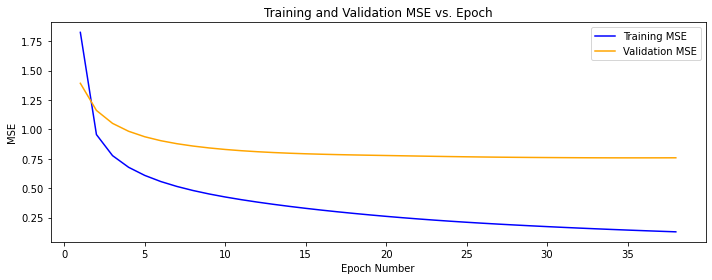

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming mse_values_train and mse_values_val are numpy arrays
mse_values_train = np.ravel(mse_values_train)
mse_values_val = np.ravel(mse_values_val)

# Plotting the learning curves
plt.figure(figsize=(10, 4))

# Plot training and validation MSE curves
plt.plot(range(1, len(mse_values_train) + 1), mse_values_train, label='Training MSE', color='blue')
plt.plot(range(1, len(mse_values_val) + 1), mse_values_val, label='Validation MSE', color='orange')

plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.title('Training and Validation MSE vs. Epoch')
plt.legend()

plt.tight_layout()
plt.show()


## TESTING - "Multi-Class"

In [90]:
# Evaluate the best model on the test set
mse_test = 0
correct = 0;
incorrect = 0;
for i, p_test in enumerate(TSTXX):
    # Forward propagation for testing using the best model
    n1_test = np.dot(best_W1, p_test).reshape(-1, 1) + best_b1
    a1_test = tansig(n1_test)
    n2_test = np.dot(best_W2, a1_test).reshape(-1, 1) + best_b2
    a2_test = tansig(n2_test)
    predicted_digit = (np.argmax(a2_test) + 1) % 10  # Predicted digit is the one with the highest activation
    true_digit = (np.argmax(TST10Y[:, i]) + 1 ) % 10 # True digit is the one with a value of 1 in the target
    if predicted_digit == true_digit:
         correct = correct + 1
    else:
         incorrect = incorrect + 1
    error_test = TST10Y[:, i].reshape(-1, 1) - a2_test
    mse_test = mse_test + (error_test ** 2).sum()  # Accumulate validation squared error
    

# Calculate and print the average testing MSE for the best model
average_mse_test = mse_test / len(TSTXX)
print(f"Final Test MSE for the Best Model: {average_mse_test}")
print(correct)
print(incorrect)
Hit_Ratio = correct/len(TSTXX)
print(Hit_Ratio)
accuracy = Hit_Ratio * 100
print(f"Accuracy: {accuracy:.2f}%")

Final Test MSE for the Best Model: 0.4179845156242826
4711
289
0.9422
Accuracy: 94.22%


In [88]:
print(best_W1.shape)
print(best_W2.shape)
print(best_b1.shape)
print(best_b2.shape)

(60, 784)
(10, 60)
(60, 1)
(10, 1)
